# Used Car Price Prediction

## Problem Statement

In this project, we are building a predictive model on our used car dataset to predict the prices of cars.

### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
X_train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


In [4]:
X_test.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0


In [94]:
y_train.head()
y=y_train.drop('carID',axis=1)
y_test.head()

,carID,price
0,12000,38000
1,12001,23495
2,12004,59999
3,12013,16713
4,12017,46000


For now , we are going to focus on X_train since that is our training dataset.

In [6]:
#Checking the shape of data
X_train.shape

(4960, 10)

In [7]:
#checking of null values
print(X_train.isnull().sum())

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [8]:
#Statistical data of our dataset
print(X_train.describe())

              carID         year        mileage          tax          mpg  \
count   4960.000000  4960.000000    4960.000000  4960.000000  4960.000000   
mean   15832.446169  2016.737903   24956.286895   152.332661    50.370766   
std     2206.717006     2.884035   24443.333662    82.403844    35.746505   
min    12002.000000  1997.000000       1.000000     0.000000     2.800000   
25%    13929.250000  2016.000000    5641.250000   145.000000    38.700000   
50%    15840.000000  2017.000000   19000.000000   145.000000    47.100000   
75%    17765.750000  2019.000000   36702.000000   150.000000    54.300000   
max    19629.000000  2020.000000  259000.000000   580.000000   470.800000   

        engineSize  
count  4960.000000  
mean      2.124375  
std       0.789368  
min       0.000000  
25%       1.600000  
50%       2.000000  
75%       2.800000  
max       6.600000  


In [9]:
#dropping unnecessary columns
X_train.drop('carID',axis=1,inplace=True)
X_test.drop('carID',axis=1,inplace=True)

# Checking and Handling Outliers

Using boxplot, we can check whether we have outliers or not.

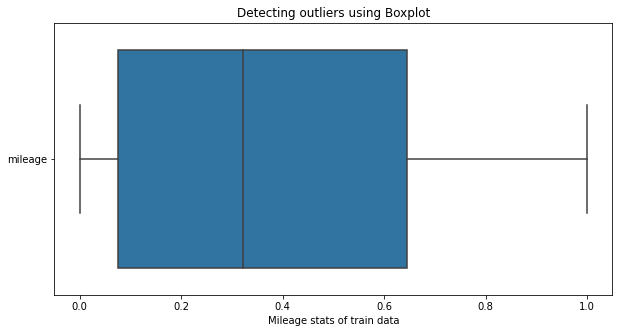

In [96]:
#boxplot
plt.figure(figsize=(10,5))
df1=X_train[['mileage']]
df2=X_train[['mpg']]
sns.boxplot(data=df1,orient="h")
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Mileage stats of train data')
plt.show()

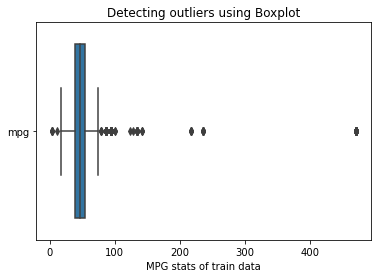

In [11]:
#boxplot for mpg
sns.boxplot(data=df2,orient="h")
plt.title("Detecting outliers using Boxplot")
plt.xlabel('MPG stats of train data')
plt.show()

## Using IQR

Detecting the outliers using Inter Quartile Range(IQR).

In [12]:
#using iqr
#training dataset
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print("The Val of Q1 and Q2 : ",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print("The lower & Upper Bound : ",lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
outliers_mileage = detect_outliers_iqr(X_train['mileage'])
outliers_mpg = detect_outliers_iqr(X_train['mpg'])
print("Number of outliers in mileage in our training dataset : ",len(outliers_mileage))
print("Number of outliers in mpg in our training dataset : ",len(outliers_mpg))

The Val of Q1 and Q2 :  5641.25 36702.0
The lower & Upper Bound :  -40949.875 83293.125
The Val of Q1 and Q2 :  38.7 54.3
The lower & Upper Bound :  15.300000000000011 77.69999999999999
Number of outliers in mileage in our training dataset :  289
Number of outliers in mpg in our training dataset :  289


Now that, we got the outliers.
We are going to handle Outliers using Quantile-based flooring and capping method.

In [13]:
#Quantile based flooring and capping
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.
# Computing 10th, 90th percentiles and replacing the outliers

#FOR Mileage column
def floor_cap(x):
    tenth_percentile = np.percentile(x, 10)
    ninetieth_percentile = np.percentile(x, 90)
    print("10th percentile is ",tenth_percentile)
    print("90th percentile is ",ninetieth_percentile)

    b = np.where(x<tenth_percentile, tenth_percentile, x)

    new_data = np.where(b>ninetieth_percentile, ninetieth_percentile, b)

    return new_data

a=floor_cap(X_train['mileage'])
print("Outlier free mileage data: ",a)

print("------------------------------------------------------------------------------------------------------")

#for MPG column
b=floor_cap(X_train['mpg'])
print("Outlier free mpg data: ",b)


10th percentile is  1500.0
90th percentile is  56000.1
Outlier free mileage data:  [ 4223.  47870.   5151.  ... 56000.1 30150.  40230. ]
------------------------------------------------------------------------------------------------------
10th percentile is  32.8
90th percentile is  62.8
Outlier free mpg data:  [39.8 60.1 32.8 ... 60.1 62.8 56.5]


In [14]:
c=floor_cap(X_test['mileage'])
print("Outlier free mpg data: ",c)

print("------------------------------------------------------------------------------------------------------")

d=floor_cap(X_test['mpg'])
print("Outlier free mpg data: ",d)

10th percentile is  1988.3000000000002
90th percentile is  57112.500000000015
Outlier free mpg data:  [12046.  37683.  10000.  ...  4111.  25726.  57112.5]
------------------------------------------------------------------------------------------------------
10th percentile is  32.8
90th percentile is  62.8
Outlier free mpg data:  [37.2 36.2 34.  ... 50.4 41.5 32.8]


Text(0.5, 0, 'Mileage')

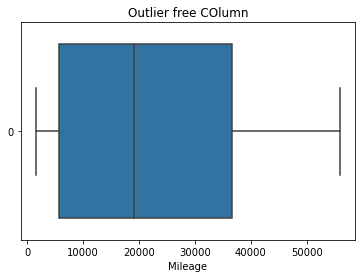

In [15]:
#We can see thorugh boxplot, we cleared outliers using flooring and capping
#mileage
sns.boxplot(data=a,orient="h")
plt.title("Outlier free COlumn")
plt.xlabel("Mileage")

Text(0.5, 0, 'MPG')

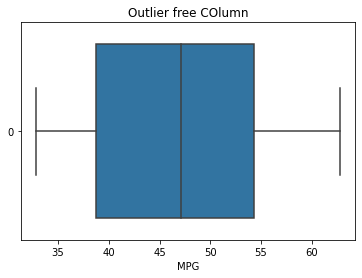

In [16]:
#mpg column
sns.boxplot(data=b,orient="h")
plt.title("Outlier free COlumn")
plt.xlabel("MPG")

Now, we are going to replace our old columns with corrected columns(outlier free column).

In [17]:
#X_train.drop(['mileage','mpg'],axis=1,inplace=True)
X_train['mileage'] = a
X_train['mpg'] = b
X_test['mileage'] = c
X_test['mpg'] = d
print(X_train.head())
print(X_test.head())

      brand      model  year transmission  mileage fuelType    tax   mpg  \
0    hyundi   Santa Fe  2019    Semi-Auto   4223.0   Diesel  145.0  39.8   
1  vauxhall        GTC  2015       Manual  47870.0   Diesel  125.0  60.1   
2      audi        RS4  2019    Automatic   5151.0   Petrol  145.0  32.8   
3        vw   Scirocco  2016    Automatic  20423.0   Diesel   30.0  57.6   
4     skoda      Scala  2020    Semi-Auto   3569.0   Petrol  145.0  47.1   

   engineSize  
0         2.2  
1         2.0  
2         2.9  
3         2.0  
4         1.0  
   brand       model  year transmission  mileage fuelType    tax   mpg  \
0   merc   GLS Class  2017    Automatic  12046.0   Diesel  150.0  37.2   
1     vw      Amarok  2017    Automatic  37683.0   Diesel  260.0  36.2   
2   merc   GLS Class  2019    Automatic  10000.0   Diesel  145.0  34.0   
3  skoda       Scala  2019       Manual   3257.0   Petrol  145.0  49.6   
4   audi         RS6  2015    Semi-Auto  20982.0   Petrol  325.0  32.8   

  

Now our dataset is outlier free. 

# Converting Categorical Features

We need to convert categorical column to dummy variables.

In [18]:
#creating dummy variable for fueltype 
fueltype = pd.get_dummies(X_train['fuelType'],drop_first=True)
fueltype1 = pd.get_dummies(X_test['fuelType'],drop_first=True)
fueltype1

,Electric,Hybrid,Other,Petrol
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
2667,0,0,0,1
2668,0,0,0,0
2669,0,0,0,1
2670,0,0,0,1


In [19]:
#creating dummy variable for transmission 
transmission = pd.get_dummies(X_train['transmission'],drop_first=True)
transmission1 = pd.get_dummies(X_test['transmission'],drop_first=True)
transmission1

,Manual,Other,Semi-Auto
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,1
...,...,...,...
2667,0,0,1
2668,0,0,0
2669,1,0,0
2670,0,0,0


In [20]:
#creating dummy variable for car brands
brand = pd.get_dummies(X_train['brand'],drop_first=True)
brand1 = pd.get_dummies(X_test['brand'],drop_first=True)
brand1.head()

,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0


In [21]:
#dropping the categirocal data to replacing it with dummy variables
X_train.drop(['transmission','fuelType','brand'],axis=1,inplace=True)
X_test.drop(['transmission','fuelType','brand'],axis=1,inplace=True)
X_test.head()

,model,year,mileage,tax,mpg,engineSize
0,GLS Class,2017,12046.0,150.0,37.2,3.0
1,Amarok,2017,37683.0,260.0,36.2,3.0
2,GLS Class,2019,10000.0,145.0,34.0,3.0
3,Scala,2019,3257.0,145.0,49.6,1.0
4,RS6,2015,20982.0,325.0,32.8,4.0


In [22]:
X_train = pd.concat([X_train,transmission,fueltype,brand],axis=1)
X_test = pd.concat([X_test,transmission1,fueltype1,brand1],axis=1)
X_test.head()

,model,year,mileage,tax,mpg,engineSize,Manual,Other,Semi-Auto,Electric,...,Other,Petrol,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw
0,GLS Class,2017,12046.0,150.0,37.2,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Amarok,2017,37683.0,260.0,36.2,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,GLS Class,2019,10000.0,145.0,34.0,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Scala,2019,3257.0,145.0,49.6,1.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,RS6,2015,20982.0,325.0,32.8,4.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# Feature Scaling 

We are using Normalization method to scale our dataset.

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scale = MinMaxScaler()

In [25]:
X_train_scaled=scale.fit_transform(X_train[['mileage','mpg','engineSize','tax']])
X_test_scaled=scale.fit_transform(X_test[['mileage','mpg','engineSize','tax']])
X_train_scaled

array([[0.04996321, 0.23333333, 0.33333333, 0.25      ],
       [0.85082413, 0.91      , 0.3030303 , 0.21551724],
       [0.0669907 , 0.        , 0.43939394, 0.25      ],
       ...,
       [1.        , 0.91      , 0.3030303 , 0.05172414],
       [0.52568711, 1.        , 0.45454545, 0.25      ],
       [0.7106409 , 0.79      , 0.45454545, 0.25862069]])

In [26]:
X_train[['mileage','mpg','engineSize','tax']]=X_train_scaled
X_test[['mileage','mpg','engineSize','tax']]=X_test_scaled
X_test

,model,year,mileage,tax,mpg,engineSize,Manual,Other,Semi-Auto,Electric,...,Other,Petrol,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw
0,GLS Class,2017,0.182455,0.258621,0.146667,0.476190,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Amarok,2017,0.647532,0.448276,0.113333,0.476190,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,GLS Class,2019,0.145339,0.250000,0.040000,0.476190,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Scala,2019,0.023015,0.250000,0.560000,0.158730,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,RS6,2015,0.344562,0.560345,0.000000,0.634921,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,A7,2015,0.346703,0.560345,0.000000,0.634921,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2668,CLS Class,2015,1.000000,0.275862,0.650000,0.476190,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2669,Puma,2020,0.038508,0.250000,0.586667,0.158730,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2670,CLA Class,2016,0.430622,0.344828,0.290000,0.317460,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


Now our dataset is ready for training.

In [27]:
x=pd.concat([X_train,y],axis=1)
x.head()

,model,year,mileage,tax,mpg,engineSize,Manual,Other,Semi-Auto,Electric,...,Petrol,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw,price
0,Santa Fe,2019,0.049963,0.250000,0.233333,0.333333,0,0,1,0,...,0,0,0,1,0,0,0,0,0,31995
1,GTC,2015,0.850824,0.215517,0.910000,0.303030,1,0,0,0,...,0,0,0,0,0,0,0,1,0,7700
2,RS4,2019,0.066991,0.250000,0.000000,0.439394,0,0,0,0,...,1,0,0,0,0,0,0,0,0,58990
3,Scirocco,2016,0.347210,0.051724,0.826667,0.303030,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12999
4,Scala,2020,0.037963,0.250000,0.476667,0.151515,0,0,1,0,...,1,0,0,0,0,1,0,0,0,16990


In [28]:
x.columns

Index(['model', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'Manual',
       'Other', 'Semi-Auto', 'Electric', 'Hybrid', 'Other', 'Petrol', 'bmw',
       'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw', 'price'],
      dtype='object')

<AxesSubplot:>

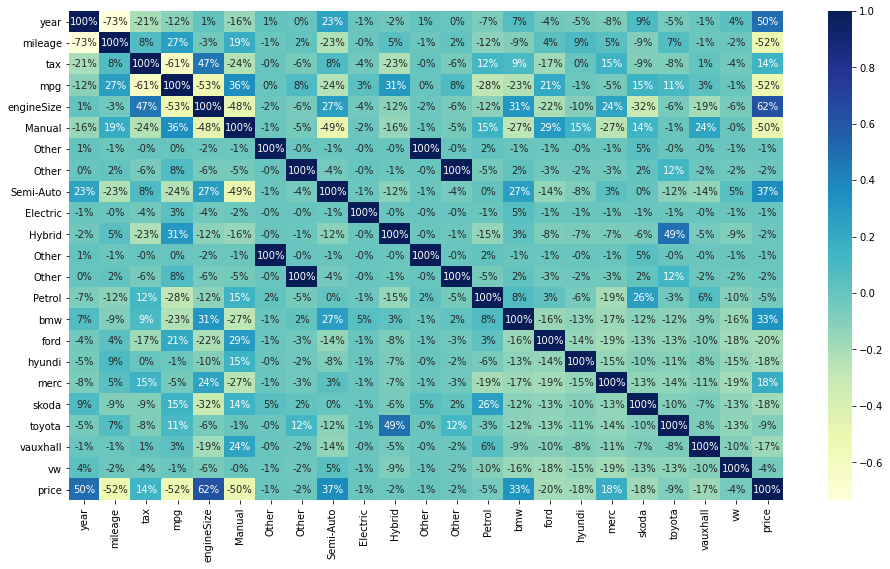

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(x[['year', 'mileage', 'tax', 'mpg', 'engineSize',
       'Manual', 'Other', 'Semi-Auto', 'Electric', 'Hybrid', 'Other', 'Petrol', 'bmw',
       'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw',
       'price']].corr(),annot=True, fmt=".0%", cmap="YlGnBu")

Lets plot few charts to get the exact relation of attributes with price.

<AxesSubplot:xlabel='year', ylabel='price'>

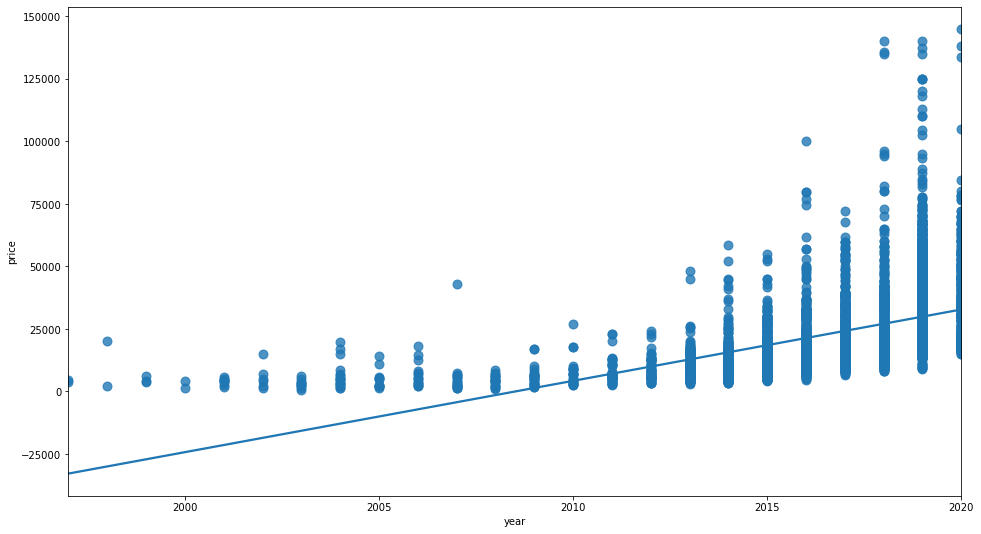

In [30]:
plt.figure(figsize=(16,9))
sns.regplot(x="year", y="price", data=x, ci = None ,scatter_kws={"s": 80})

<AxesSubplot:xlabel='mileage', ylabel='price'>

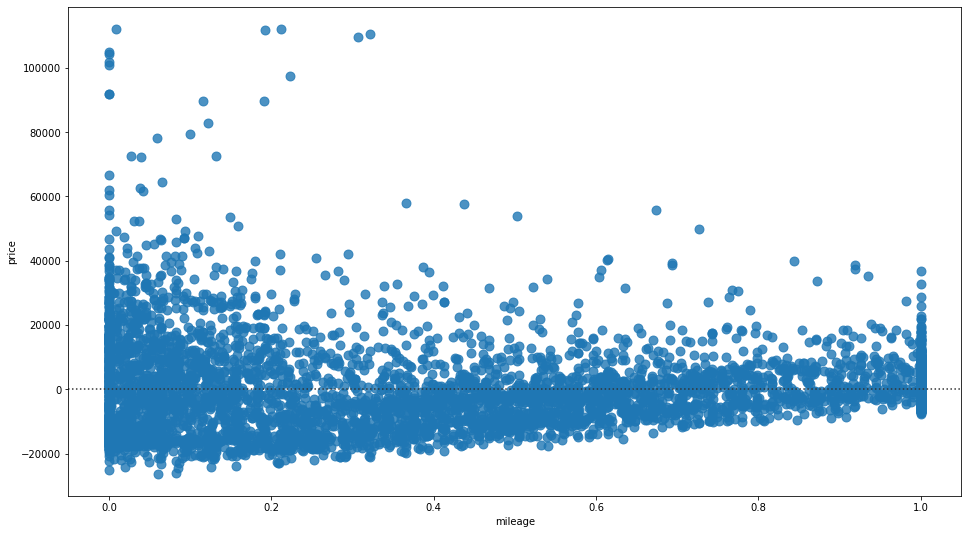

In [31]:
plt.figure(figsize=(16,9))
sns.residplot(x="mileage", y="price",data=x, scatter_kws={"s": 80})

<Figure size 720x720 with 0 Axes>

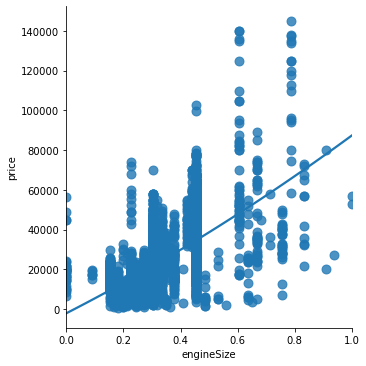

In [32]:
plt.figure(figsize=(10,10))
sns.lmplot(x="engineSize", y="price", data=x,
           order=2, ci=None, scatter_kws={"s": 80})

From plots we get that simple regression model is not apporpriate for our prediction.

# Training and Predicting

Though we know that linear regression is not appropriate for our dataset but still for comparing we are going to use it.

In [59]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [53]:
X_train1=X_train.drop('model',axis=1)
X_test1=X_test.drop('model',axis=1)

In [87]:
#reg = LinearRegression().fit(X_train1, y_train)
#reg = DecisionTreeRegressor().fit(X_train1, y_train)
reg = RandomForestRegressor().fit(X_train1, y_train)

In [88]:
predict = reg.predict(X_test1)
predict

array([[14451.87      , 38705.52      ],
       [15704.92      , 24015.07      ],
       [16590.54      , 59257.785     ],
       ...,
       [16702.97      , 20959.07      ],
       [17024.39      , 24497.96      ],
       [16593.73257143,  4447.41428571]])

In [92]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [89]:
print(f"r2_score : {r2_score(y_test,predict)}")

r2_score : 0.3352190057729229


In [90]:
 print(f"mean absolute percentage error : {mean_absolute_percentage_error(y_test,predict)}")

mean absolute percentage error : 0.13571582989840664


In [93]:
print("root mean square error :",mean_squared_error(y_test,predict,squared=False))

root mean square error : 4175.901669946726


# Plotting the results

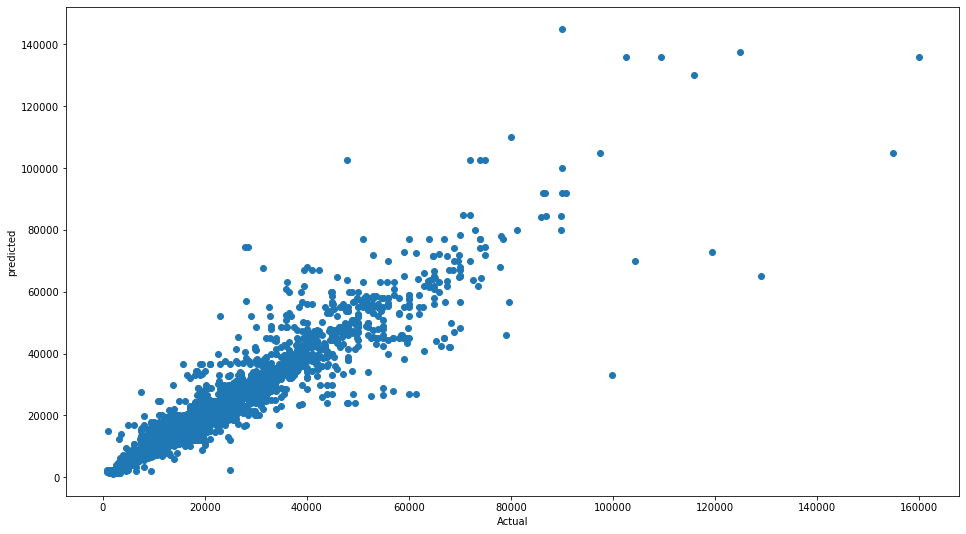

In [70]:
plt.figure(figsize=(16,9))
plt.scatter(y_test,predict)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

In [91]:
model_results = pd.DataFrame({'Model':['LinearRegression','DecicisonTree','RandomForest'],
                            'r2_score':[0.3737,'-0.0431','0.3552'],
                            'mean_absolute_percentage_error' : [0.2184,'0.2674','0.1357']})
model_results

,Model,r2_score,mean_absolute_percentage_error
0,LinearRegression,0.3737,0.2184
1,DecicisonTree,-0.0431,0.2674
2,RandomForest,0.3552,0.1357
